This file is used to save all the events from the larges continuous data between the to devices: 21/08/2023 to 22/10/2023

In [23]:
from stereo3d import stereo_read_from_pickle as std_read
from parsivel import pars_read_from_pickle as pars_read
from aux_funcs.extract_events import is_event
from pathlib import Path
from matplotlib import pyplot as plt
from numpy import logical_and
import numpy as np
pars_full_event = Path("/home/marcio/stage_project/data/saved_events/parsivel02.obj")
str_full_event = Path("/home/marcio/stage_project/data/saved_events/stereo02.obj")

In [6]:
# Read the main parsivel series
parsivel_full_event = pars_read(pars_full_event)
stereo_full_event = std_read(str_full_event)

Split into envents

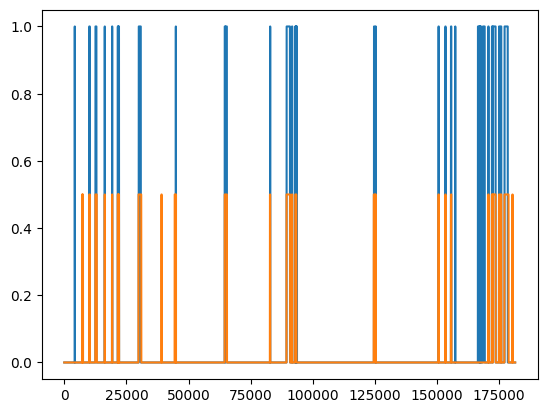

In [27]:
parsivel_events = is_event(parsivel_full_event.rain_rate,15, 0.1)
stereo_events = is_event(stereo_full_event.rain_rate(), 15,0.1)
plt.plot(parsivel_events)
plt.plot(stereo_events*0.5)

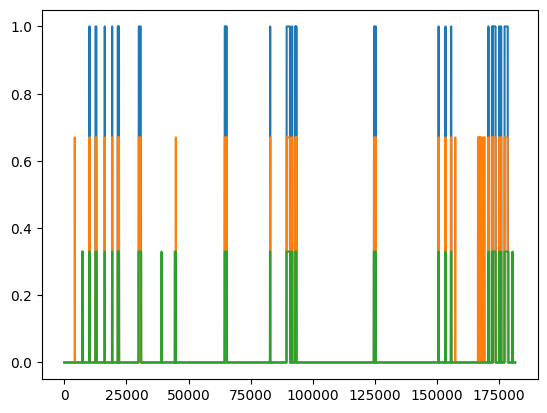

In [28]:
simutainous_events = logical_and(parsivel_events, stereo_events[:-1])
plt.plot(simutainous_events)
plt.plot(parsivel_events*0.67)
plt.plot(stereo_events*0.33)

In [29]:
parsivel_events = parsivel_full_event.colect_events(simutainous_events)
len(parsivel_events)

27

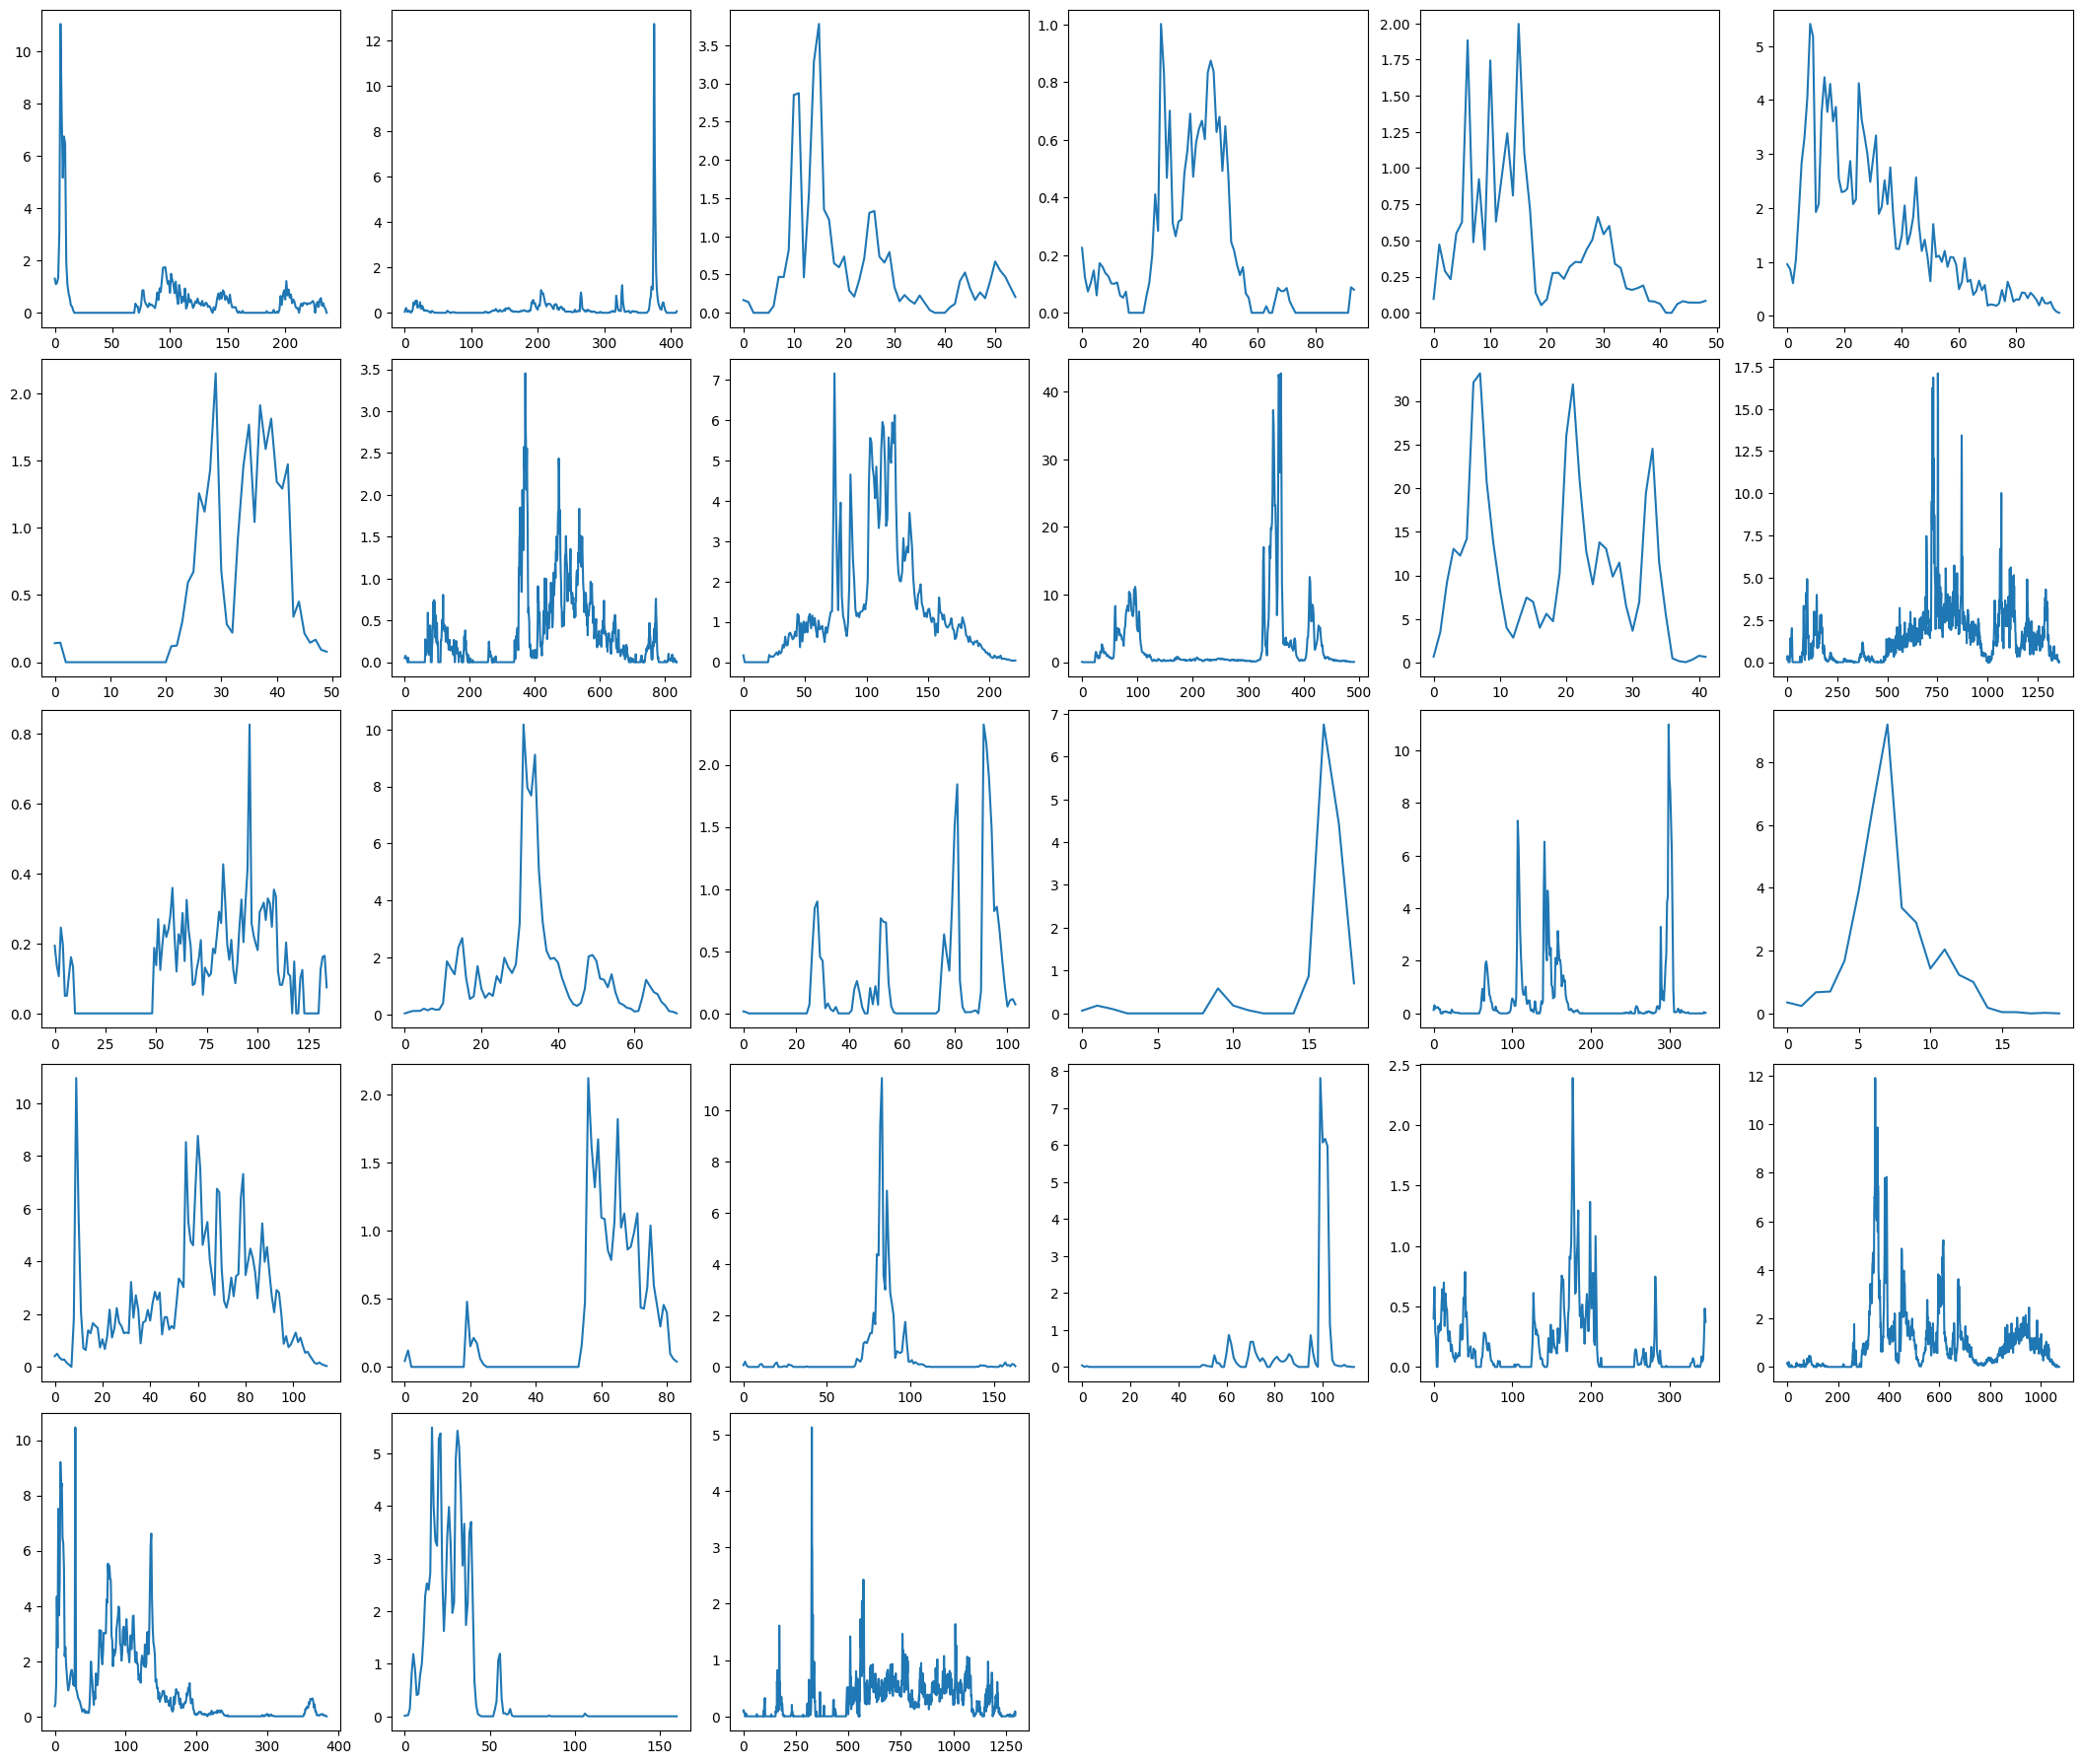

In [30]:
n = int(np.ceil(len(parsivel_events)**0.5))
figure = plt.figure()
figure.set_size_inches((n*3 +3, n*3 + 3))
figure.set_constrained_layout(True)
for i, event in enumerate(parsivel_events):
    ax = figure.add_subplot(n,n, i + 1)
    ax.plot(event.rain_rate)

#### Select event from Stereo 3D

In [31]:
stereo_events = stereo_full_event.extract_events([pars_event.duration for pars_event in parsivel_events])
all(pars_event.duration == stereo_event.duration for pars_event, stereo_event in zip(parsivel_events, stereo_events))

True

### Save the event for stereo 3D and parsivel

Filter for outliers

In [32]:
outliers = [i for i, (pars_event, stereo_event) in enumerate(zip(parsivel_events, stereo_events)) if pars_event.total_depth_for_event > 10000 or stereo_event.total_depth_for_event > 10000]
for i, idx in enumerate(outliers):
    parsivel_events.pop(idx - i)
    stereo_events.pop(idx - i)
outliers

[]

In [34]:
pars_folder = Path("/home/marcio/stage_project/data/saved_events/pars_events/")
stereo_folder = Path("/home/marcio/stage_project/data/saved_events/stereo_events")
# Clear the folders from previous use
for file in pars_folder.iterdir():
    file.unlink()
for file in stereo_folder.iterdir():
    file.unlink()
for i, (pars_event, stereo_event) in enumerate(zip(parsivel_events, stereo_events)):
    pars_event.to_pickle(pars_folder / f"event{i+1:>02}.obj")
    stereo_event.to_pickle(stereo_folder / f"event{i+1:>02}.obj")